In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import math
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# Importing data
import os
os.chdir('C:\\Users\gmoor\Documents\Economic Analytics 1\Data')

data = pd.read_csv('College.csv')

data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# Changing the column name perc.alumni to palumni
data.rename(columns = {'perc.alumni':'palumni'}, inplace = True)

In [4]:
# Fitting the models from Homework 2
# I modified the models from Homework 2 to increase in number of predictors 
OLS1 = smf.ols('palumni ~ Top10perc + Outstate', data=data).fit()
OLS2 = smf.ols('palumni ~ Top10perc + Outstate + Private', data=data).fit()
OLS3 = smf.ols('palumni ~ Top10perc + Outstate + Private + Apps', data=data).fit()
OLS4 = smf.ols('palumni ~ Top10perc + Outstate + Private + Apps + Books', data=data).fit()
OLS5 = smf.ols('palumni ~ Top10perc + Outstate + Private + Apps + Books + Expend', data=data).fit()

In [5]:
# Extracting metrics 
adjusted_r2 = [OLS1.rsquared_adj, OLS2.rsquared_adj, OLS3.rsquared_adj, OLS4.rsquared_adj, OLS5.rsquared_adj]
aic_values = [OLS1.aic, OLS2.aic, OLS3.aic, OLS4.aic, OLS5.aic]
bic_values = [OLS1.bic, OLS2.bic, OLS3.bic, OLS4.bic, OLS5.bic]

# Displaying metrics
print(adjusted_r2)
print(aic_values)
print(bic_values)

# Identifying the lowest 
print(max(adjusted_r2))
print(min(aic_values))
print(min(bic_values))

[0.34644090123463933, 0.3716630177345145, 0.3879878672099141, 0.39161185358982653, 0.39085929900674954]
[5789.021754896745, 5759.4373500511865, 5739.977379325754, 5736.355623781765, 5738.307715085253]
[5802.988075947847, 5778.059111452657, 5763.254581077592, 5764.288265883971, 5770.895797537827]
0.39161185358982653
5736.355623781765
5763.254581077592


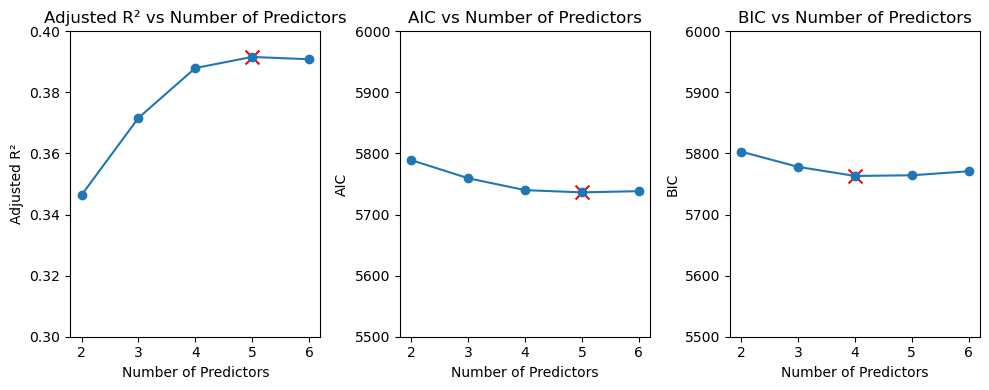

In [7]:
# Setting number of predictors (2 to 6)
x = [2, 3, 4, 5, 6]

# Converting lists to numpy arrays
adjusted_r2 = np.array(adjusted_r2)
aic_values = np.array(aic_values)
bic_values = np.array(bic_values)

# Setting plot size
plt.figure(figsize=(10, 4))

# Plotting
plt.subplot(1, 3, 1)
plt.plot(x, adjusted_r2, marker='o')
highest_r2_idx = adjusted_r2.argmax()
plt.scatter(x[highest_r2_idx], adjusted_r2[highest_r2_idx], color='r', marker='x', s=100)

plt.ylim(0.3, 0.4)
plt.title('Adjusted R² vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R²')


# Plotting AIC
plt.subplot(1, 3, 2)
plt.plot(x, aic_values, marker='o')
lowest_aic_idx = aic_values.argmin()
plt.scatter(x[lowest_aic_idx], aic_values[lowest_aic_idx], color='r', marker='x', s=100)

plt.ylim(5500, 6000)
plt.title('AIC vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')


# Plotting BIC
plt.subplot(1, 3, 3)
plt.plot(x, bic_values, marker='o')
lowest_bic_idx = bic_values.argmin()
plt.scatter(x[lowest_bic_idx], bic_values[lowest_bic_idx], color='r', marker='x', s=100)
plt.ylim(5500, 6000)
plt.title('BIC vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')


# Displaying the plots
plt.tight_layout()
plt.show()